In [1]:
import arrow as arw
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from salishsea_tools import places, teos_tools

%matplotlib inline

# Get Observations

In [2]:
observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSCVIPCTD15mV1')
east_observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSEVIPCTD15mV1')
bbl_observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCLSBBLCTD15mV1')
ddl_observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCUSDDLCTD15mV1')

In [3]:
sals = observations_dataset.variables['s.salinity']
temps = observations_dataset.variables['s.temperature']
times = observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
sal_obs = pd.Series(sals[:], index=jd)
sal_obs_hourly = sal_obs.resample('1H').mean()
temp_obs = pd.Series(temps[:], index=jd)
temp_obs_hourly = temp_obs.resample('1H').mean()

In [4]:
sals = east_observations_dataset.variables['s.salinity']
temps = east_observations_dataset.variables['s.temperature']
times = east_observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
east_sal_obs = pd.Series(sals[:], index=jd)
east_sal_obs_hourly = east_sal_obs.resample('1H').mean()
east_temp_obs = pd.Series(temps[:], index=jd)
east_temp_obs_hourly = east_temp_obs.resample('1H').mean()

In [5]:
sals = bbl_observations_dataset.variables['s.salinity']
temps = bbl_observations_dataset.variables['s.temperature']
times = bbl_observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
bbl_sal_obs = pd.Series(sals[:], index=jd)
bbl_sal_obs_hourly = bbl_sal_obs.resample('1H').mean()
bbl_temp_obs = pd.Series(temps[:], index=jd)
bbl_temp_obs_hourly = bbl_temp_obs.resample('1H').mean()

In [6]:
sals = ddl_observations_dataset.variables['s.salinity']
temps = ddl_observations_dataset.variables['s.temperature']
times = ddl_observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
ddl_sal_obs = pd.Series(sals[:], index=jd)
ddl_sal_obs_hourly = ddl_sal_obs.resample('1H').mean()
ddl_temp_obs = pd.Series(temps[:], index=jd)
ddl_temp_obs_hourly = ddl_temp_obs.resample('1H').mean()

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


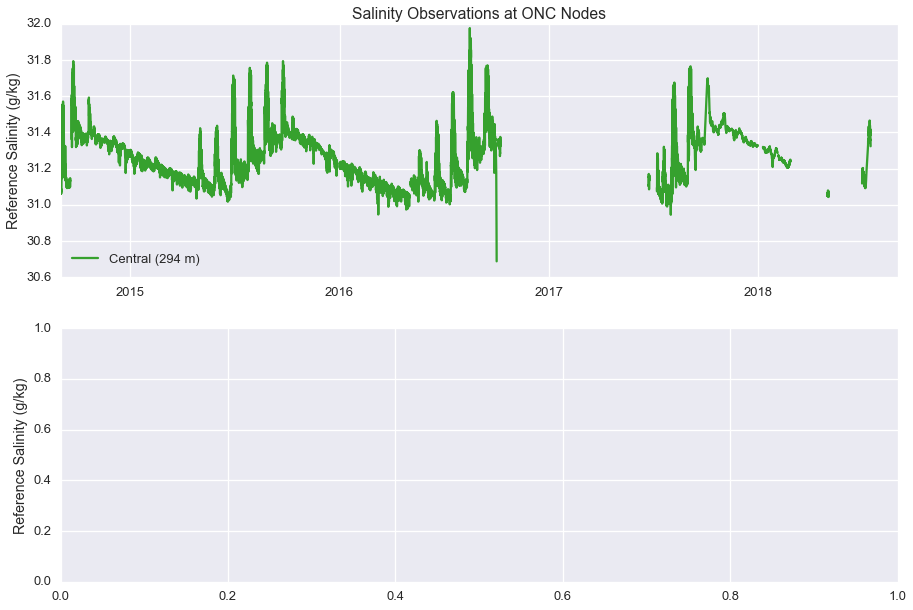

In [7]:
sns.set(color_codes=True)
sns.set_context("talk")
sns.set_palette(sns.color_palette("Paired"))
myp = sns.color_palette()
fig, axs = plt.subplots(2, 1, figsize=(15, 10)) 
#ddl_sal_obs_hourly.plot(ax=axs[1], label='DDL (107 m)', color=myp[2]) 
#bbl_sal_obs_hourly.plot(ax=axs[1], label='BBL (143 m)', color=myp[3]) 
#east_sal_obs_hourly.plot(ax=axs[0], label='East (164 m)', color=myp[2])  
sal_obs_hourly.plot(ax=axs[0], label='Central (294 m)', color=myp[3]) 
for ax in [axs[0], axs[1]]:
    ax.set_ylabel('Reference Salinity (g/kg)')
    ax.legend(loc='lower left')
axs[0].set_title('Salinity Observations at ONC Nodes')


In [9]:
netcdf_file = nc.Dataset('/results/SalishSea/hindcast/13nov15/SalishSea_1h_20151113_20151113_grid_T.nc')
ncunits = netcdf_file.variables['time_counter'].units
nncunits = 'seconds since 1970-01-01 00:00:00'
print(netcdf_file.variables['time_counter'][0], nncunits)
N34_units = "seconds since 2014-09-10 00:00:00"

3656363400.0 seconds since 1970-01-01 00:00:00


# Get Model Results

In [9]:
placename = ''
use_title = 'Salinity at VENUS Central'


(3, 744)
[datetime.datetime(2014, 10, 1, 0, 30)
 datetime.datetime(2014, 10, 1, 1, 30)
 datetime.datetime(2014, 10, 1, 2, 30) ...,
 datetime.datetime(2017, 8, 31, 21, 30)
 datetime.datetime(2017, 8, 31, 22, 30)
 datetime.datetime(2017, 8, 31, 23, 30)]


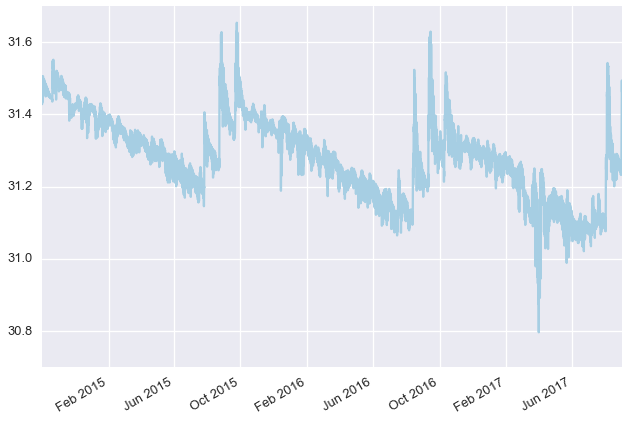

In [10]:
timeseries = 'NowcastGreen1702'
tail = '.npy'
model_results = np.load(timeseries + placename + 'oct14' + tail)
print (model_results.shape)
for smonth in ['nov14', 'dec14', 'jan15', 'feb15', 'mar15', 
               'apr15', 'may15', 'jun15', 'jul15', 'aug15', 'sep15', 
               'oct15', 'nov15', 'dec15', 'jan16', 'feb16', 'mar16', 'apr16', 'may16', 
               'jun16', 'jul16', 'aug16', 'sep16', 'oct16', 'nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    model_results = np.append(model_results, np.load(timeseries + placename + smonth + tail), axis=1)

jp = nc.num2date(model_results[0], ncunits)
print(jp)
sal_model = pd.Series(model_results[1], index=jp)
sal_model.plot()

In [11]:
timeseries = 'Nowcast-3.4'
tail = '.npy'
N34_model_results = np.load(timeseries +placename+ 'oct14' + tail)
for smonth in ['nov14', 'dec14', 'jan15', 'feb15', 'mar15', 
               'apr15', 'may15', 'jun15', 'jul15', 'aug15', 'sep15', 
               'oct15', 'nov15', 'dec15', 'jan16', 'feb16', 'mar16', 
               'apr16', 'may16', 'jun16', 'jul16', 'aug16', 'sep16', 'oct16']:
    N34_model_results = np.append(N34_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jp34 = nc.num2date(N34_model_results[0], N34_units)
N34_sal_model = pd.Series(N34_model_results[1], index=jp34)

In [12]:
timeseries = 'NowcastBlue1610'
tail = '.npy'
NB16_model_results = np.load(timeseries +placename+ 'oct16' + tail)
for smonth in ['nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    NB16_model_results = np.append(NB16_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jpB16 = nc.num2date(NB16_model_results[0], ncunits)
NB16_sal_model = pd.Series(NB16_model_results[1], index=jpB16)

In [13]:
timeseries = 'NowcastGreen1610'
tail = '.npy'
NG16_model_results = np.load(timeseries +placename+ 'dec15' + tail)
for smonth in ['jan16','feb16', 'mar16', 'apr16', 'may16', 
               'jun16', 'jul16', 'aug16', 'sep16', 'oct16', 'nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    NG16_model_results = np.append(NG16_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jpG16 = nc.num2date(NG16_model_results[0], ncunits)
NG16_sal_model = pd.Series(NG16_model_results[1], index=jpG16)

In [14]:
timeseries = 'Hindcast201806'
tail = '.npy'
H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15', 'jan16',
#              'feb17', 'mar17', 'apr17', 'may17', 
#               'jun17', 'jul17', 'aug17'
              ]:
    H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jpH18 = nc.num2date(H18_model_results[0], ncunits)
H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

# Do Comparison Plot

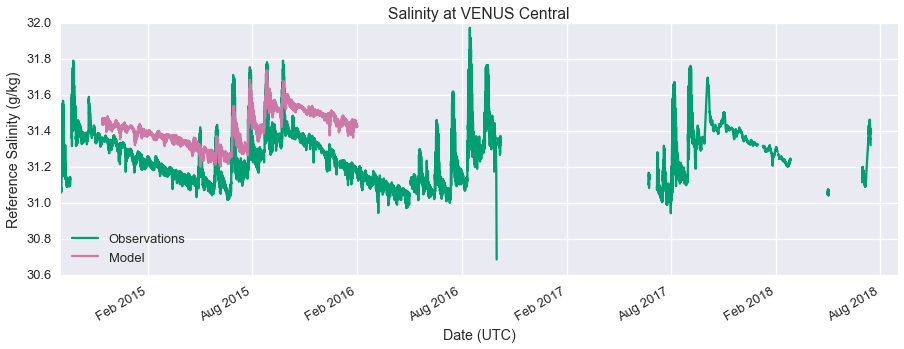

In [15]:
sns.set_palette(sns.color_palette("colorblind"))
myp = sns.color_palette()
#sns.palplot(myp)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
#N34_sal_model.plot(ax=ax, label='Model 3.4')  
#NG16_sal_model.plot(ax=ax, label='Model 201602G', color=myp[4])
#NB16_sal_model.plot(ax=ax, label='Model 201602B', color=myp[5])

H18_sal_model.plot(ax=ax, label='', color='white')
sal_obs_hourly.plot(ax=ax, label='Observations', color=myp[1])
#sal_model.plot(ax=ax, label='v201702', color=myp[2])
H18_sal_model.plot(ax=ax, label='Model', color=myp[3])


#ax.plot(model_results[0], model_results[1])
ax.legend(loc='lower left', ncol=1)
ax.set_ylabel('Reference Salinity (g/kg)')
ax.set_xlabel('Date (UTC)')
ax.set_title(use_title)

(8, 12)

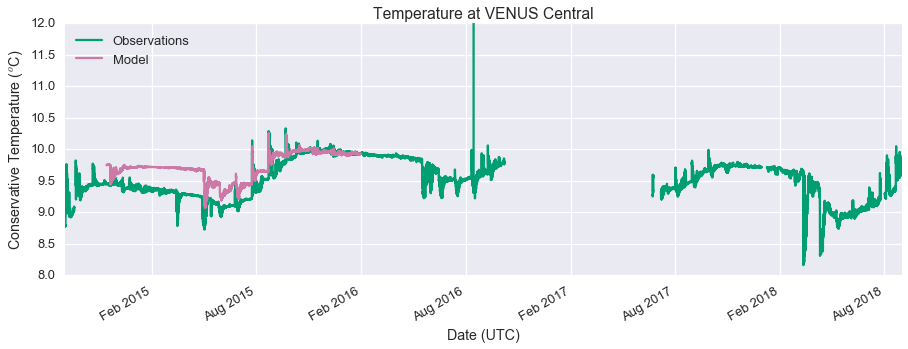

In [16]:
sns.set_palette(sns.color_palette("colorblind"))
myp = sns.color_palette()
#sns.palplot(myp)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
#N34_sal_model.plot(ax=ax, label='Model 3.4')  
#NG16_sal_model.plot(ax=ax, label='Model 201602G', color=myp[4])
#NB16_sal_model.plot(ax=ax, label='Model 201602B', color=myp[5])

H18_temp_model.plot(ax=ax, label='', color='white')
temp_obs_hourly.plot(ax=ax, label='Observations', color=myp[1])
#sal_model.plot(ax=ax, label='v201702', color=myp[2])
H18_temp_model.plot(ax=ax, label='Model', color=myp[3])


#ax.plot(model_results[0], model_results[1])
ax.legend(loc='upper left', ncol=1)
ax.set_ylabel('Conservative Temperature ($^o$C)')
ax.set_xlabel('Date (UTC)')
ax.set_title("Temperature at VENUS Central")
ax.set_ylim((8,12))

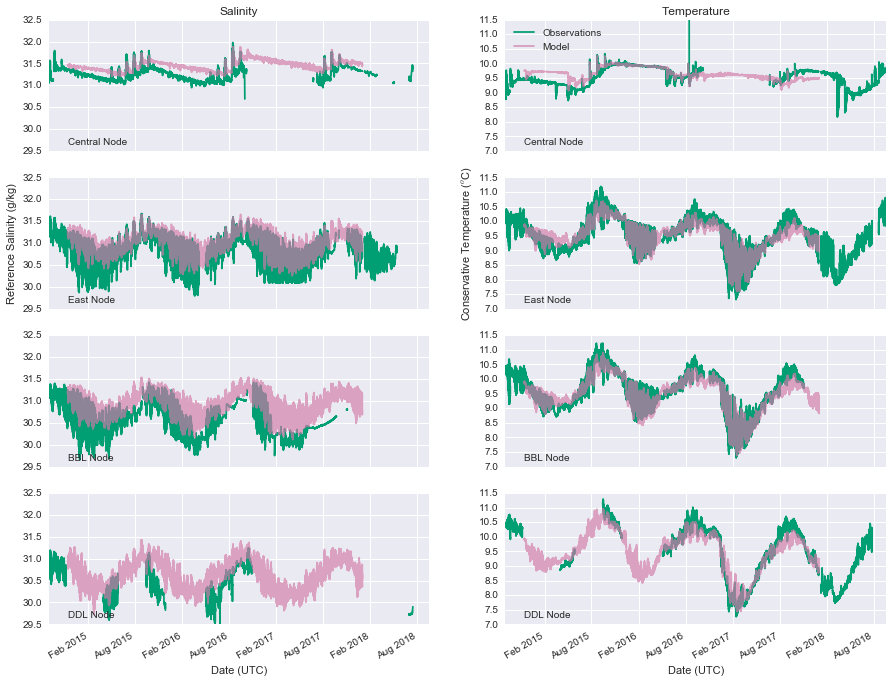

In [10]:
timeseries = 'Hindcast201806'
timeseries2 = 'Hindcast201806_p2'
timeseries3 = 'Hindcast201806_p3'
tail = '.npy'

fig, axs = plt.subplots(4, 2, figsize=(15, 12))
for count, placename in enumerate(['', 'East', 'BBL', 'DDL']):          

    H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
    for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15',
              ]:
        H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan16', 'feb16', 'mar16', 'apr16', 'may16', 'jun16', 'jul16',
                  'aug16', 'sep16', 'oct16', 'nov16', 'dec16']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries2 +placename+ smonth + tail), axis=1)
    for smonth in ['jan17', 'feb17', 'mar17', 'apr17', 'may17', 'jun17',
                  'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries3 +placename+ smonth + tail), axis=1)

    jpH18 = nc.num2date(H18_model_results[0], ncunits)
    H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
    H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

    sns.set_palette(sns.color_palette("colorblind"))
    myp = sns.color_palette()

    H18_sal_model.plot(ax=axs[count, 0], label='', color='white')
    if placename == 'East':
        east_sal_obs_hourly.plot(ax=axs[count, 0], label='Observations', color=myp[1])
        axs[count, 0].text(0.05, 0.05, 'East Node', transform=axs[count, 0].transAxes)
    elif placename == 'BBL':
        bbl_sal_obs_hourly.plot(ax=axs[count, 0], label='Observations', color=myp[1])
        axs[count, 0].text(0.05, 0.05, 'BBL Node', transform=axs[count, 0].transAxes)
    elif placename == 'DDL':
        ddl_sal_obs_hourly.plot(ax=axs[count, 0], label='Observations', color=myp[1])
        axs[count, 0].text(0.05, 0.05, 'DDL Node', transform=axs[count, 0].transAxes)
    else:
        sal_obs_hourly.plot(ax=axs[count, 0], label='Observations', color=myp[1])
        axs[count, 0].text(0.05, 0.05, 'Central Node', transform=axs[count, 0].transAxes)
    H18_sal_model.plot(ax=axs[count, 0], label='Model', color=myp[3], alpha=0.7)

    H18_temp_model.plot(ax=axs[count, 1], label='', color='white')
    if placename == 'East': 
        east_temp_obs_hourly.plot(ax=axs[count, 1], label='Observations', color=myp[1])
        axs[count, 1].text(0.05, 0.05, 'East Node', transform=axs[count, 1].transAxes)
    elif placename == 'BBL':
        bbl_temp_obs_hourly.plot(ax=axs[count, 1], label='Observations', color=myp[1])
        axs[count, 1].text(0.05, 0.05, 'BBL Node', transform=axs[count, 1].transAxes)
    elif placename == 'DDL':
        ddl_temp_obs_hourly.plot(ax=axs[count, 1], label='Observations', color=myp[1])
        axs[count, 1].text(0.05, 0.05, 'DDL Node', transform=axs[count, 1].transAxes)
    else:
        temp_obs_hourly.plot(ax=axs[count, 1], label='Observations', color=myp[1])
        axs[count, 1].text(0.05, 0.05, 'Central Node', transform=axs[count, 1].transAxes)
        start = min(temp_obs_hourly.index.min(), sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = max(temp_obs_hourly.index.max(), sal_obs_hourly.index.max(), H18_sal_model.index.max())
    H18_temp_model.plot(ax=axs[count, 1], label='Model', color=myp[3], alpha=0.7)
    
axs[1, 1].set_ylabel('Conservative Temperature ($^o$C)')
axs[1, 0].set_ylabel('Reference Salinity (g/kg)')
    

axs[3, 0].set_xlabel('Date (UTC)')
axs[3, 1].set_xlabel('Date (UTC)')
axs[0, 0].set_title('Salinity')
axs[0, 1].set_title('Temperature')
    
axs[0, 1].legend(loc='upper left', ncol=1)

labels = [item.get_text() for item in axs[0, 0].get_xticklabels()]
empty_string_labels = ['']*len(labels)
for i in range(3):
    for j in range(2):
        axs[i, j].set_xticklabels(empty_string_labels)
    
for j in range(4):
    axs[j, 1].set_ylim((7, 11.5));
    axs[j, 0].set_ylim((29.5, 32.5));
    for i in range(2):
        axs[j, i].set_xlim((start, end))

# New Hindcast: Model VENUS Comparison

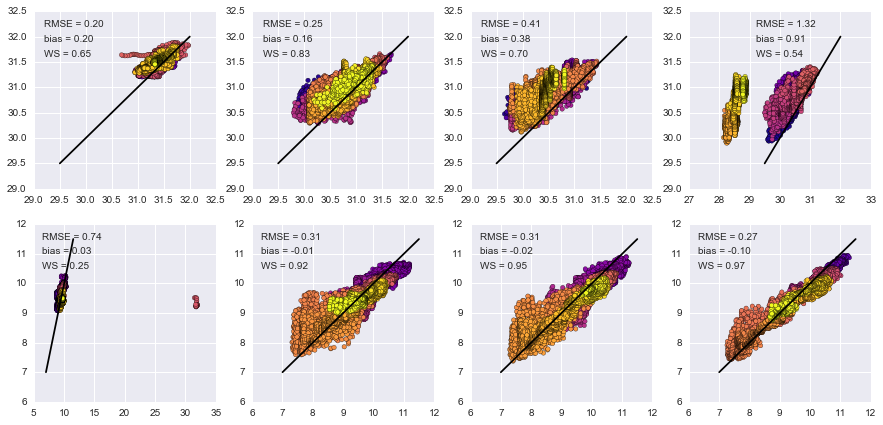

In [11]:
timeseries = 'Hindcast201806'
timeseries2 = 'Hindcast201806_p2'
timeseries3 = 'Hindcast201806_p3'
tail = '.npy'

fig, axs = plt.subplots(2, 4, figsize=(15, 7))
for count, placename in enumerate(['', 'East', 'BBL', 'DDL']):          

    H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
    for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15',
              ]:
        H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan16', 'feb16', 'mar16', 'apr16', 'may16', 'jun16', 'jul16',
                  'aug16', 'sep16', 'oct16', 'nov16', 'dec16']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries2 +placename+ smonth + tail), axis=1)
    for smonth in ['jan17', 'feb17', 'mar17', 'apr17', 'may17', 'jun17',
                  'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries3 +placename+ smonth + tail), axis=1)        

    jpH18 = nc.num2date(H18_model_results[0], ncunits)
    H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
    H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

    sns.set_palette(sns.color_palette("colorblind"))
    myp = sns.color_palette()
    
    if placename == 'East':
        start = max(east_sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(east_sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = east_sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(east_temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(east_temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = east_temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    elif placename == 'BBL':
        start = max(bbl_sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(bbl_sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = bbl_sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(bbl_temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(bbl_temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = bbl_temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    elif placename == 'DDL':
        start = max(ddl_sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(ddl_sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = ddl_sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(ddl_temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(ddl_temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = ddl_temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    else:
        start = max(sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    mse =  ((merged.value_mod - merged.value_obs) **2).mean() 
    bias = merged.value_mod.mean() - merged.value_obs.mean()
    Willmott = 1 - mse/(((merged.value_mod - merged.value_obs.mean()).abs() + 
                        (merged.value_obs - merged.value_obs.mean()).abs())**2).mean()
    axs[0, count].text(29.2, 32.2, 'RMSE = %.2f' % mse ** 0.5)
    axs[0, count].text(29.2, 31.9, 'bias = %.2f' % bias)
    axs[0, count].text(29.2, 31.6, 'WS = %.2f' % Willmott)
    mse =  ((mergedt.value_mod - mergedt.value_obs) **2).mean() 
    bias = mergedt.value_mod.mean() - mergedt.value_obs.mean()
    Willmott = 1 - mse/(((mergedt.value_mod - mergedt.value_obs.mean()).abs() + 
                        (mergedt.value_obs - mergedt.value_obs.mean()).abs())**2).mean()
    axs[1, count].text(6.3, 11.5, 'RMSE = %.2f' % mse ** 0.5)
    axs[1, count].text(6.3, 11, 'bias = %.2f' % bias)
    axs[1, count].text(6.3, 10.5, 'WS = %.2f' % Willmott)

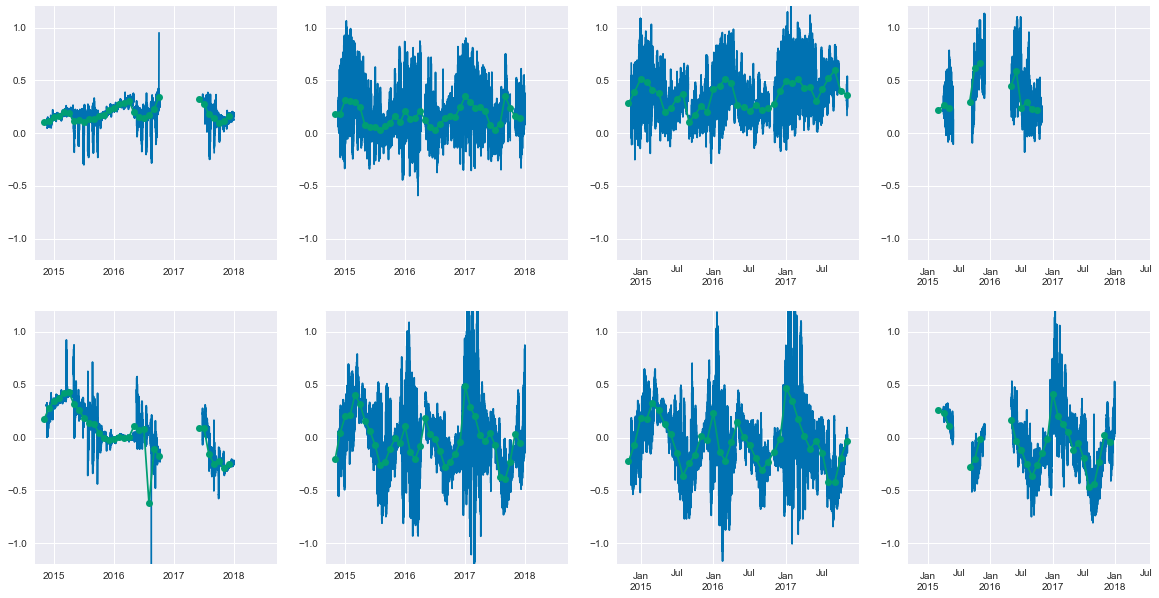

In [13]:
timeseries = 'Hindcast201806'
timeseries2 = 'Hindcast201806_p2'
timeseries3 = 'Hindcast201806_p3'
tail = '.npy'

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for count, placename in enumerate(['', 'East', 'BBL', 'DDL']):          

    H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
    for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15', 
              ]:
        H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan16', 'feb16', 'mar16', 'apr16', 'may16', 'jun16', 'jul16',
                  'aug16', 'sep16', 'oct16', 'nov16', 'dec16']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries2 +placename+ smonth + tail), axis=1)
    for smonth in ['jan17', 'feb17', 'mar17', 'apr17', 'may17', 'jun17',
                  'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries3 +placename+ smonth + tail), axis=1)

    jpH18 = nc.num2date(H18_model_results[0], ncunits)
    H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
    H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

    sns.set_palette(sns.color_palette("colorblind"))
    myp = sns.color_palette()
    
    if placename == 'East':
        (H18_sal_model.resample('H').interpolate() - east_sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - east_sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')
        
        (H18_temp_model.resample('H').interpolate() - east_temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - east_temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')        
    elif placename == 'BBL':
        (H18_sal_model.resample('H').interpolate() - bbl_sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - bbl_sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')

        (H18_temp_model.resample('H').interpolate() - bbl_temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - bbl_temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')
    elif placename == 'DDL':
        (H18_sal_model.resample('H').interpolate() - ddl_sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - ddl_sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')
        
        (H18_temp_model.resample('H').interpolate() - ddl_temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - ddl_temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')
    else:
        (H18_sal_model.resample('H').interpolate() - sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')
        
        (H18_temp_model.resample('H').interpolate() - temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')
              
for j in range(4):
    axs[1, j].set_ylim((-1.2, 1.2));
    axs[0, j].set_ylim((-1.2, 1.2));

        

In [ ]:
(H18_sal_model.resample('H').interpolate() - ddl_sal_obs_hourly).resample('M').mean().plot(marker='o')

In [ ]:
secondsConversion = 2208988800